# Global Income Distribution

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
sns.set()

Optionally set chart style

In [4]:
# sns.set(style="white")
# sns.set_context("paper", rc={"font.size":10,"axes.titlesize":30,"axes.labelsize":20}) 
# sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":20,"axes.titlesize":20,"axes.labelsize":20},style="white")

## Data

In [5]:
df = pd.read_csv('figure5data.csv')

In [6]:
df.head(3)

,midpoint,gdpc,a2003,a2013,c2003,c2013
0,10.0,20,0.193099,0.092346,0.193099,0.092346
1,30.0,40,0.279632,0.092270,0.472732,0.184616
2,50.0,60,0.354766,0.106717,0.827497,0.291334


After 14,000 entries, the scale changes

In [7]:
subset = df.loc[df['midpoint'] < 14000]

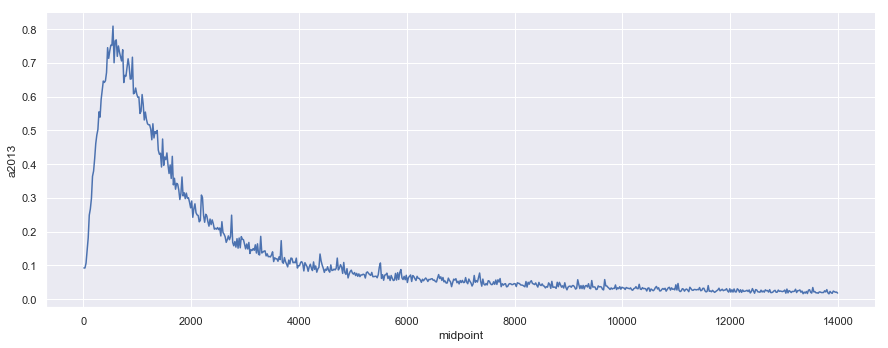

In [8]:
chart = sns.relplot(
  x="midpoint", 
  y="a2013", 
  kind="line", 
  data=subset, 
  height=5,
  aspect=10/4
)

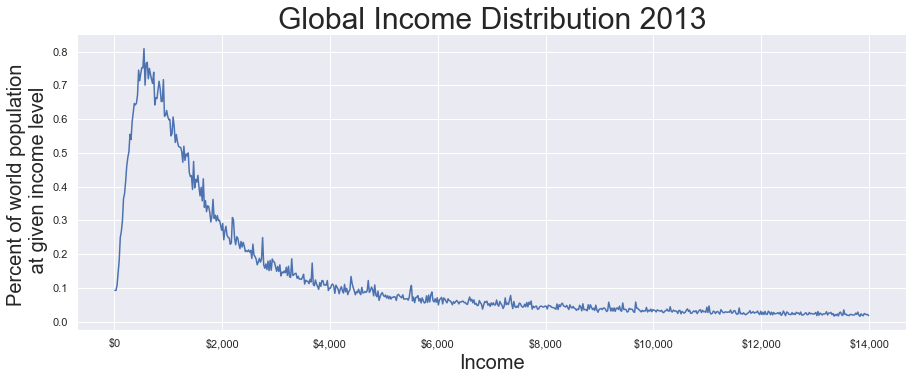

In [9]:
# chart.set(
#   xscale="linear", # can be "log"
#   xlabel='Income', 
#   ylabel='Percent of world population at given income level',
#   title='Global Income Distribution 2013',
# )

chart.axes[0][0].set_title("Global Income Distribution 2013", fontsize=30)
chart.axes[0][0].set_xlabel("Income",fontsize=20)
chart.axes[0][0].set_ylabel("Percent of world population \n at given income level",fontsize=20)

ticks = chart.axes[0][0].get_xticks()
xlabels = ['$' + '{:,.0f}'.format(x) for x in ticks]
chart.set_xticklabels(xlabels)

chart.fig

## Percentile graph

In [10]:
df.head(5)

,midpoint,gdpc,a2003,a2013,c2003,c2013
0,10.0,20,0.193099,0.092346,0.193099,0.092346
1,30.0,40,0.279632,0.092270,0.472732,0.184616
2,50.0,60,0.354766,0.106717,0.827497,0.291334
3,70.0,80,0.505162,0.143204,1.332659,0.434538
4,90.0,100,0.647129,0.181157,1.979788,0.615695


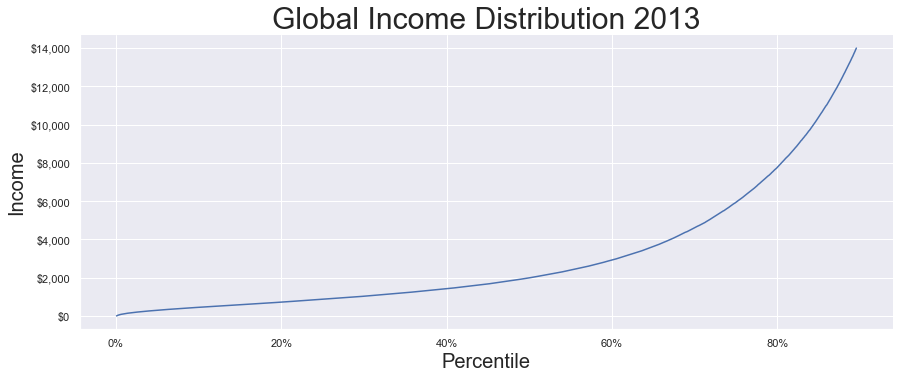

In [11]:
chart2 = sns.relplot(
  y="midpoint", 
  x="c2013", 
  kind="line", 
  data=subset, 
  height=5,
  aspect=10/4
)

chart2.axes[0][0].set_title("Global Income Distribution 2013", fontsize=30)
chart2.axes[0][0].set_xlabel("Percentile",fontsize=20)
chart2.axes[0][0].set_ylabel("Income",fontsize=20)

ticks_x = chart2.axes[0][0].get_xticks()
xlabels = ['{:,.0f}'.format(x) + '%' for x in ticks_x]
chart2.set_xticklabels(xlabels)

ticks_y = chart2.axes[0][0].get_yticks()
ylabels = ['$' + '{:,.0f}'.format(y) for y in ticks_y]
chart2.set_yticklabels(ylabels)

# Prepare data for over $14,000

In [12]:
df.head(5)

,midpoint,gdpc,a2003,a2013,c2003,c2013
0,10.0,20,0.193099,0.092346,0.193099,0.092346
1,30.0,40,0.279632,0.092270,0.472732,0.184616
2,50.0,60,0.354766,0.106717,0.827497,0.291334
3,70.0,80,0.505162,0.143204,1.332659,0.434538
4,90.0,100,0.647129,0.181157,1.979788,0.615695


In [13]:
df.tail(5)

,midpoint,gdpc,a2003,a2013,c2003,c2013
1394,650000.0,700000,2.196618e-06,5.707618e-06,99.999998,99.999994
1395,750000.0,800000,1.046824e-06,2.630042e-06,99.999999,99.999997
1396,850000.0,900000,5.432730e-07,1.313583e-06,99.999999,99.999998
1397,950000.0,1000000,3.014858e-07,6.997651e-07,99.999999,99.999999
1398,NaN,Above,5.097248e-07,1.042394e-06,100.000000,100.000000


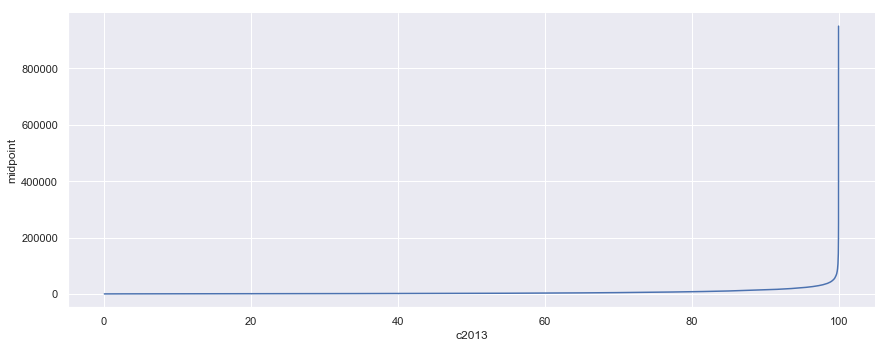

In [14]:
chart = sns.relplot(
  y="midpoint", 
  x="c2013", 
  kind="line", 
  data=df, 
  height=5,
  aspect=10/4
)

## Get percentile based on income

In [15]:
def get_percentile(income):
  for j in range(len(df)):
    if df['midpoint'].iloc[j] > income:
      return(df.iloc[j]['c2013'])

In [16]:
get_percentile(9000)

82.58228128821541